In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Load Prepared Data

In [3]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\DS\Internship\Cleaned_merged_data_Dhanshree.csv")

## Visualizing Data

In [5]:
data.columns

Index(['ActivitySiteID', 'ActivityDescription',
       'BookingEndDateTime(Day/Month/Year)', 'BookingStartTime', 'MaxBookees',
       'Number Booked', 'Price (INR)', 'ClassName', 'ClassTime'],
      dtype='object')

In [6]:
data['BookingEndDateTime(Day/Month/Year)'].head() 

0    08/04/2018
1    15/04/2018
2    22/04/2018
3    29/04/2018
4    06/05/2018
Name: BookingEndDateTime(Day/Month/Year), dtype: object

### Converting column to datetime format

In [8]:
data['BookingEndDateTime(Day/Month/Year)'] = pd.to_datetime(data['BookingEndDateTime(Day/Month/Year)'], format='%d/%m/%Y')

In [9]:
# Extract day, week, and month for grouping
data['Day'] = data['BookingEndDateTime(Day/Month/Year)'].dt.date
data['Week'] = data['BookingEndDateTime(Day/Month/Year)'].dt.to_period('W').apply(lambda r: r.start_time)
data['Month'] = data['BookingEndDateTime(Day/Month/Year)'].dt.to_period('M').apply(lambda r: r.start_time)

# Count the bookings per day, week, and month

# 1. Count bookings by day
data_day = data.groupby('Day').size()

# 2. Count bookings by week
data_week = data.groupby('Week').size()

# 3. Count bookings by month
data_month = data.groupby('Month').size()


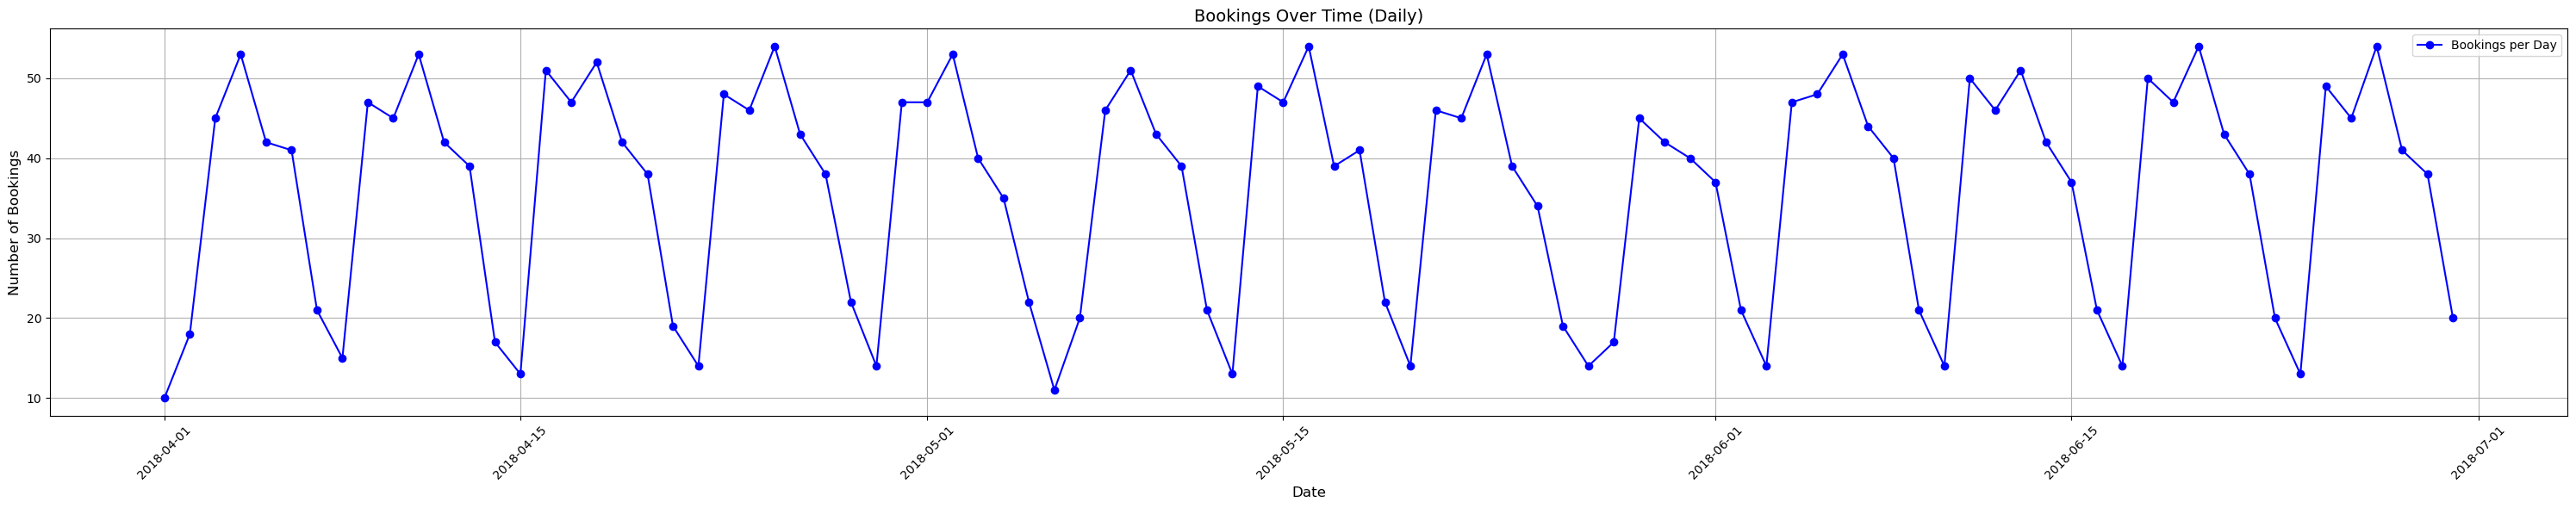

In [10]:
# Ploting the number of bookings by day
plt.figure(figsize=(30, 6))
data_day.plot(kind='line', marker='o', color='b', label='Bookings per Day')
plt.title('Bookings Over Time (Daily)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


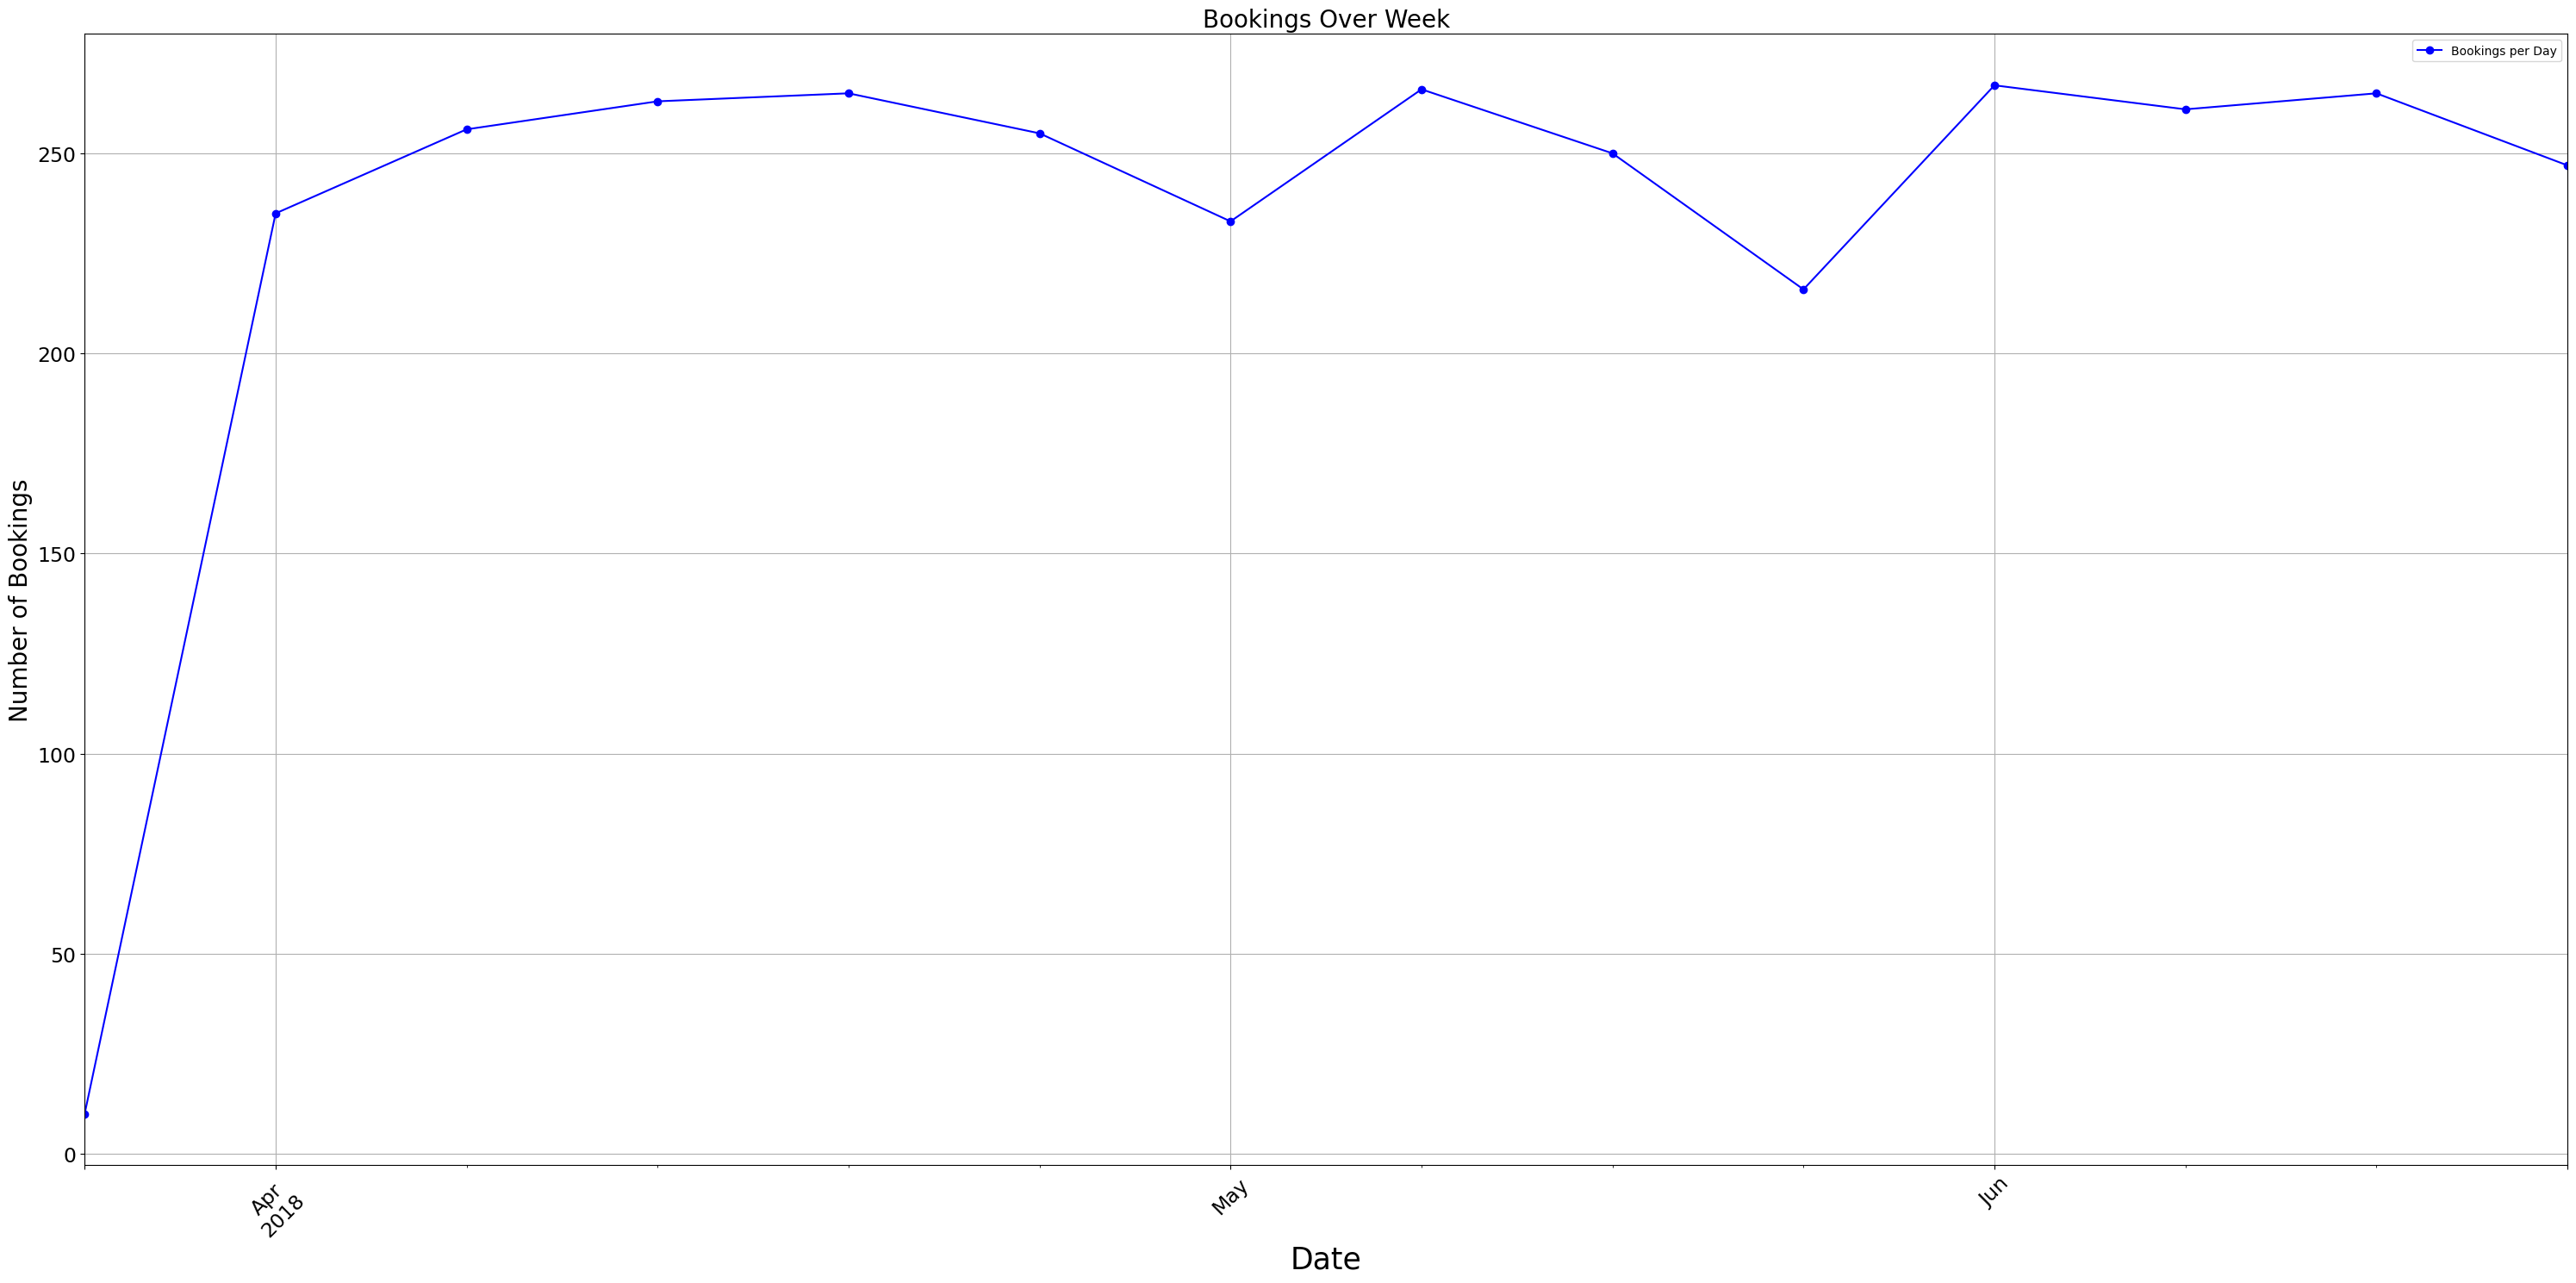

In [11]:
# Ploting the number of bookings by week
plt.figure(figsize=(30, 15))
data_week.plot(kind='line', marker='o', color='b', label='Bookings per Day', fontsize =17)
plt.title('Bookings Over Week', fontsize=20)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Number of Bookings', fontsize=20)
plt.xticks(rotation=45 , fontsize=17)
plt.yticks( fontsize=17)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


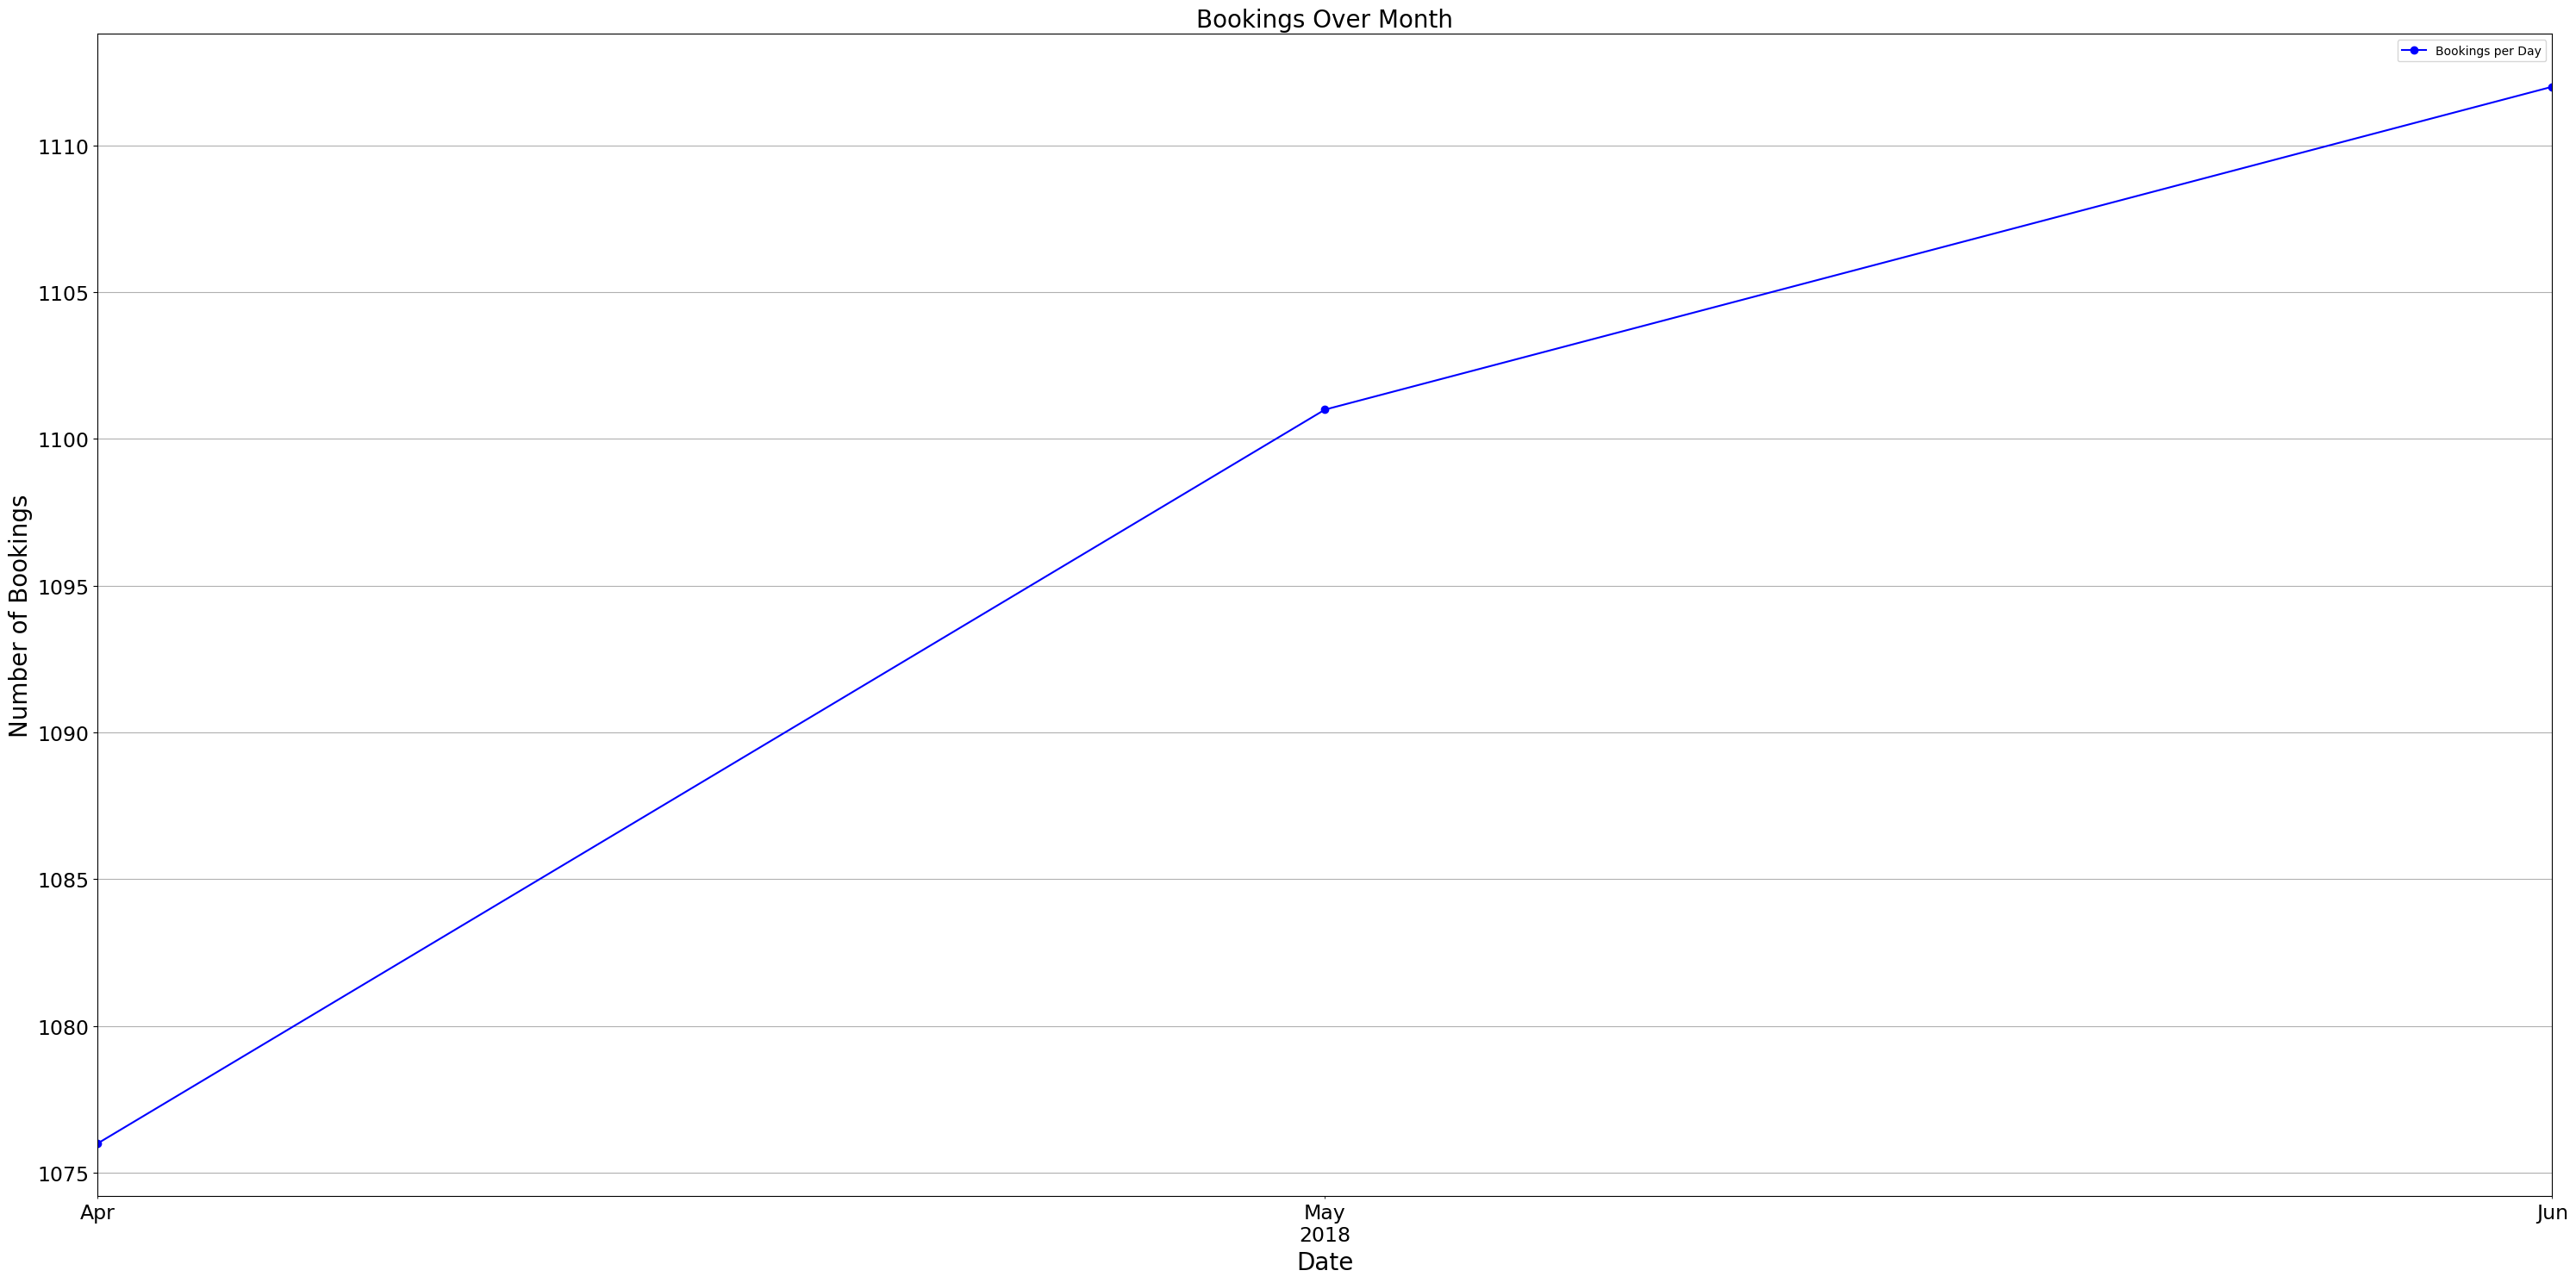

In [12]:
# Ploting the number of bookings by month
plt.figure(figsize=(30, 15))
data_month.plot(kind='line', marker='o', color='b', label='Bookings per Day',fontsize=17)
plt.title('Bookings Over Month', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Bookings', fontsize=20)
plt.xticks(rotation=45 , fontsize=17)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
data.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime(Day/Month/Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),ClassName,ClassTime,Day,Week,Month
0,HXP,T-T-T 2.45pm-3.45pm,2018-04-08,02:45 PM,25,12,499,T-T-T,2.45pm-3.45pm,2018-04-08,2018-04-02,2018-04-01
1,HXP,T-T-T 2.45pm-3.45pm,2018-04-15,02:45 PM,25,15,499,T-T-T,2.45pm-3.45pm,2018-04-15,2018-04-09,2018-04-01
2,HXP,T-T-T 2.45pm-3.45pm,2018-04-22,02:45 PM,25,14,499,T-T-T,2.45pm-3.45pm,2018-04-22,2018-04-16,2018-04-01
3,HXP,T-T-T 2.45pm-3.45pm,2018-04-29,02:45 PM,25,9,499,T-T-T,2.45pm-3.45pm,2018-04-29,2018-04-23,2018-04-01
4,HXP,T-T-T 2.45pm-3.45pm,2018-05-06,02:45 PM,25,7,499,T-T-T,2.45pm-3.45pm,2018-05-06,2018-04-30,2018-05-01


In [14]:
# Aggregate the total number of bookings per class
bookings_per_class = data.groupby('ClassName')['Number Booked'].sum().reset_index()

bookings_per_class.tail()

,ClassName,Number Booked
96,Wm Better Living Team,1
97,Yoga,774
98,Yogalates,1568
99,Zumba,1678
100,Zumba Gold,796


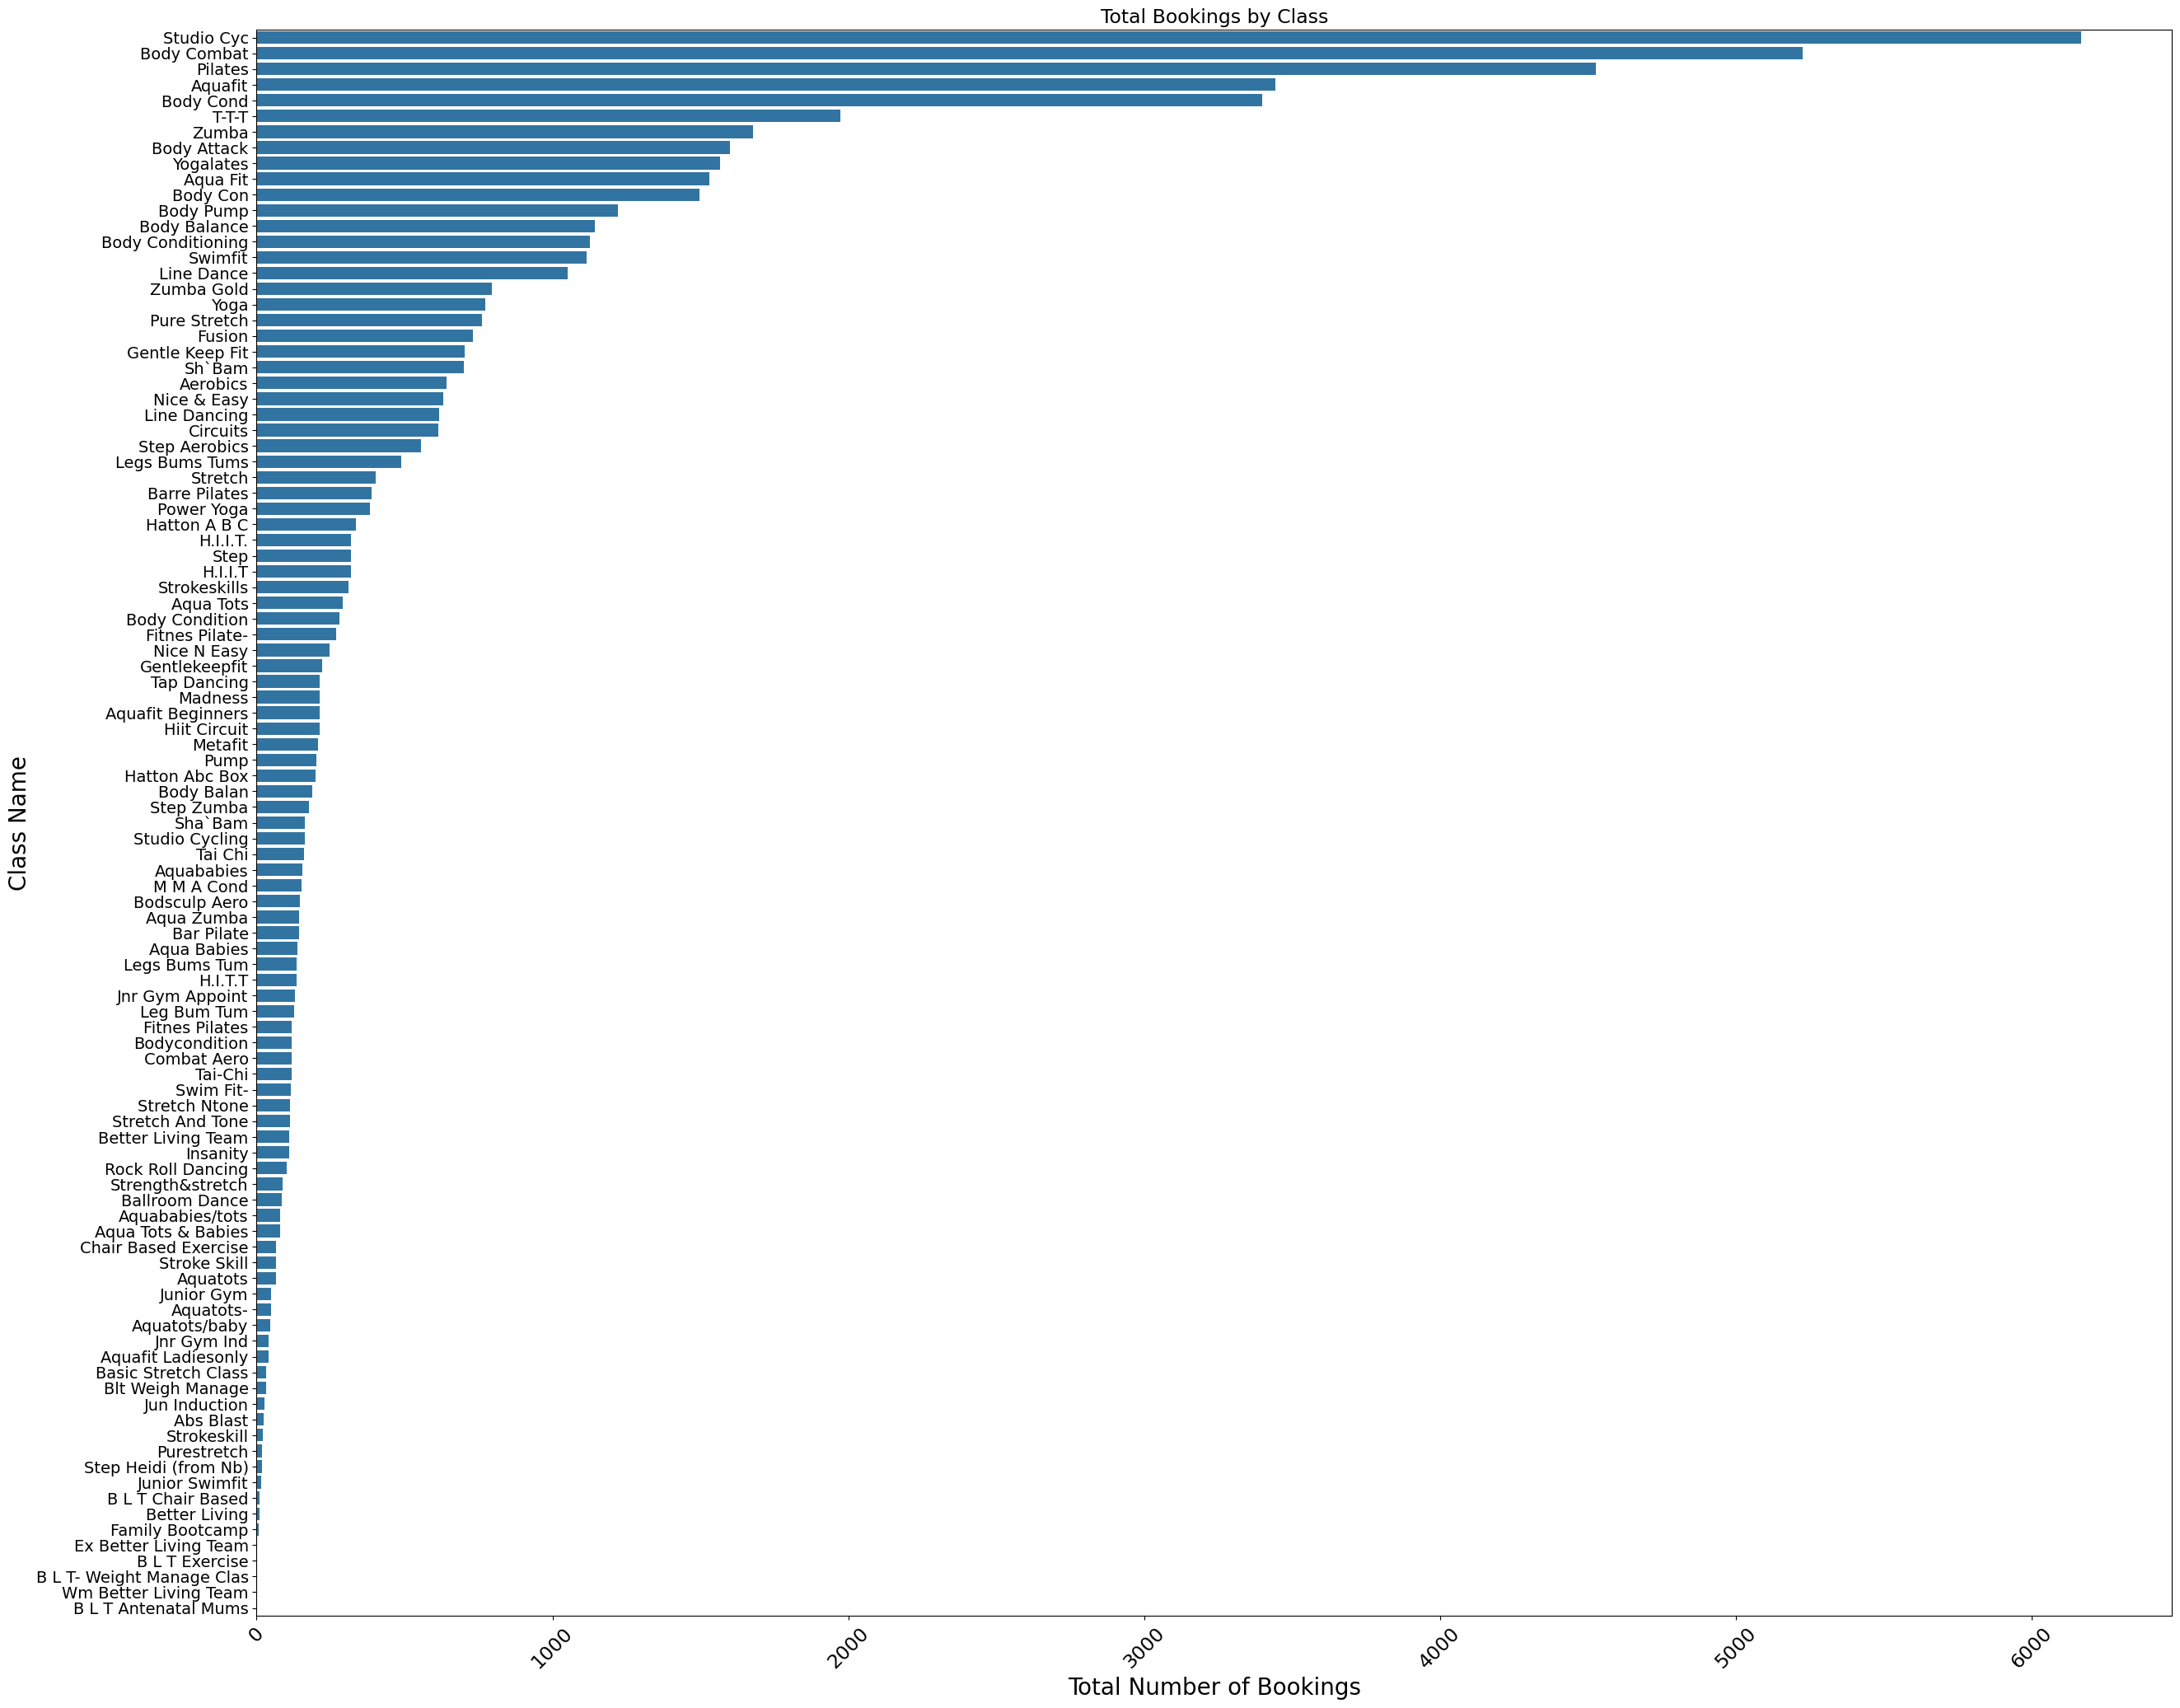

In [15]:
# Ploting the bar chart of number booked Vs classname
plt.figure(figsize=(30, 25))
sns.barplot(x='Number Booked', y='ClassName', data=bookings_per_class.sort_values(by='Number Booked', ascending=False))
plt.title('Total Bookings by Class',fontsize=17)
plt.xlabel('Total Number of Bookings',fontsize=20)
plt.ylabel('Class Name',fontsize=20)
plt.xticks(rotation=45 , fontsize=17)
plt.yticks( fontsize=14)
plt.show()

studio cyc,body combat,pilates these classes having more bookings 

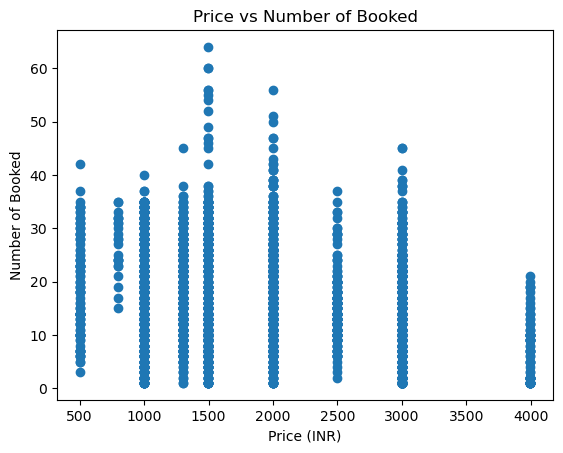

In [17]:
# Ploting the number of bookings Vs Price 
plt.scatter(data['Price (INR)'], data['Number Booked'])
plt.xlabel('Price (INR)')
plt.ylabel('Number of Booked')
plt.title('Price vs Number of Booked')
plt.show()

#### From above scatter plot we can say that , data is more scattered for Rs.1500

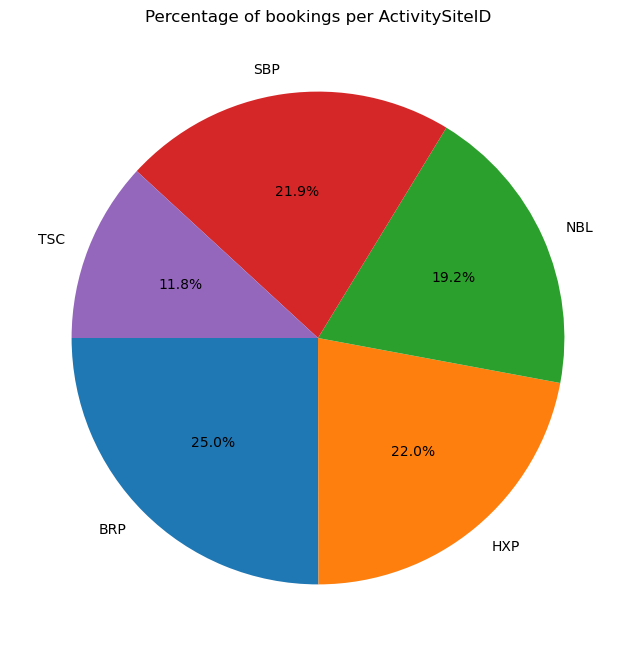

In [19]:
bookings_per_center = data.groupby('ActivitySiteID')['Number Booked'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(bookings_per_center['Number Booked'], labels=bookings_per_center['ActivitySiteID'], autopct='%1.1f%%', startangle=180)
plt.title('Percentage of bookings per ActivitySiteID')
plt.show()

#### From above pie chart , we can clearly see that BRP  having more bookings 

In [21]:
#descriptive statistics
print(data.describe())

      BookingEndDateTime(Day/Month/Year)   MaxBookees  Number Booked  \
count                               3289  3289.000000    3289.000000   
mean       2018-05-16 08:58:57.610215680    32.179386      17.088781   
min                  2018-04-01 00:00:00     2.000000       1.000000   
25%                  2018-04-24 00:00:00    24.000000      10.000000   
50%                  2018-05-16 00:00:00    30.000000      16.000000   
75%                  2018-06-08 00:00:00    35.000000      24.000000   
max                  2018-06-30 00:00:00    70.000000      64.000000   
std                                  NaN    15.092156       9.504098   

       Price (INR)                           Week  \
count  3289.000000                           3289   
mean   1850.778656  2018-05-13 23:10:57.829127680   
min     499.000000            2018-03-26 00:00:00   
25%    1299.000000            2018-04-23 00:00:00   
50%    1499.000000            2018-05-14 00:00:00   
75%    2499.000000            201

In [22]:
average_price_per_class = data.groupby('ClassName')['Price (INR)'].mean().sort_values()

C:\Users\HP\AppData\Local\Temp\ipykernel_9536\3577219923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_per_class.values, y=average_price_per_class.index, palette='magma', order=average_price_per_class.sort_values(ascending=False).index)


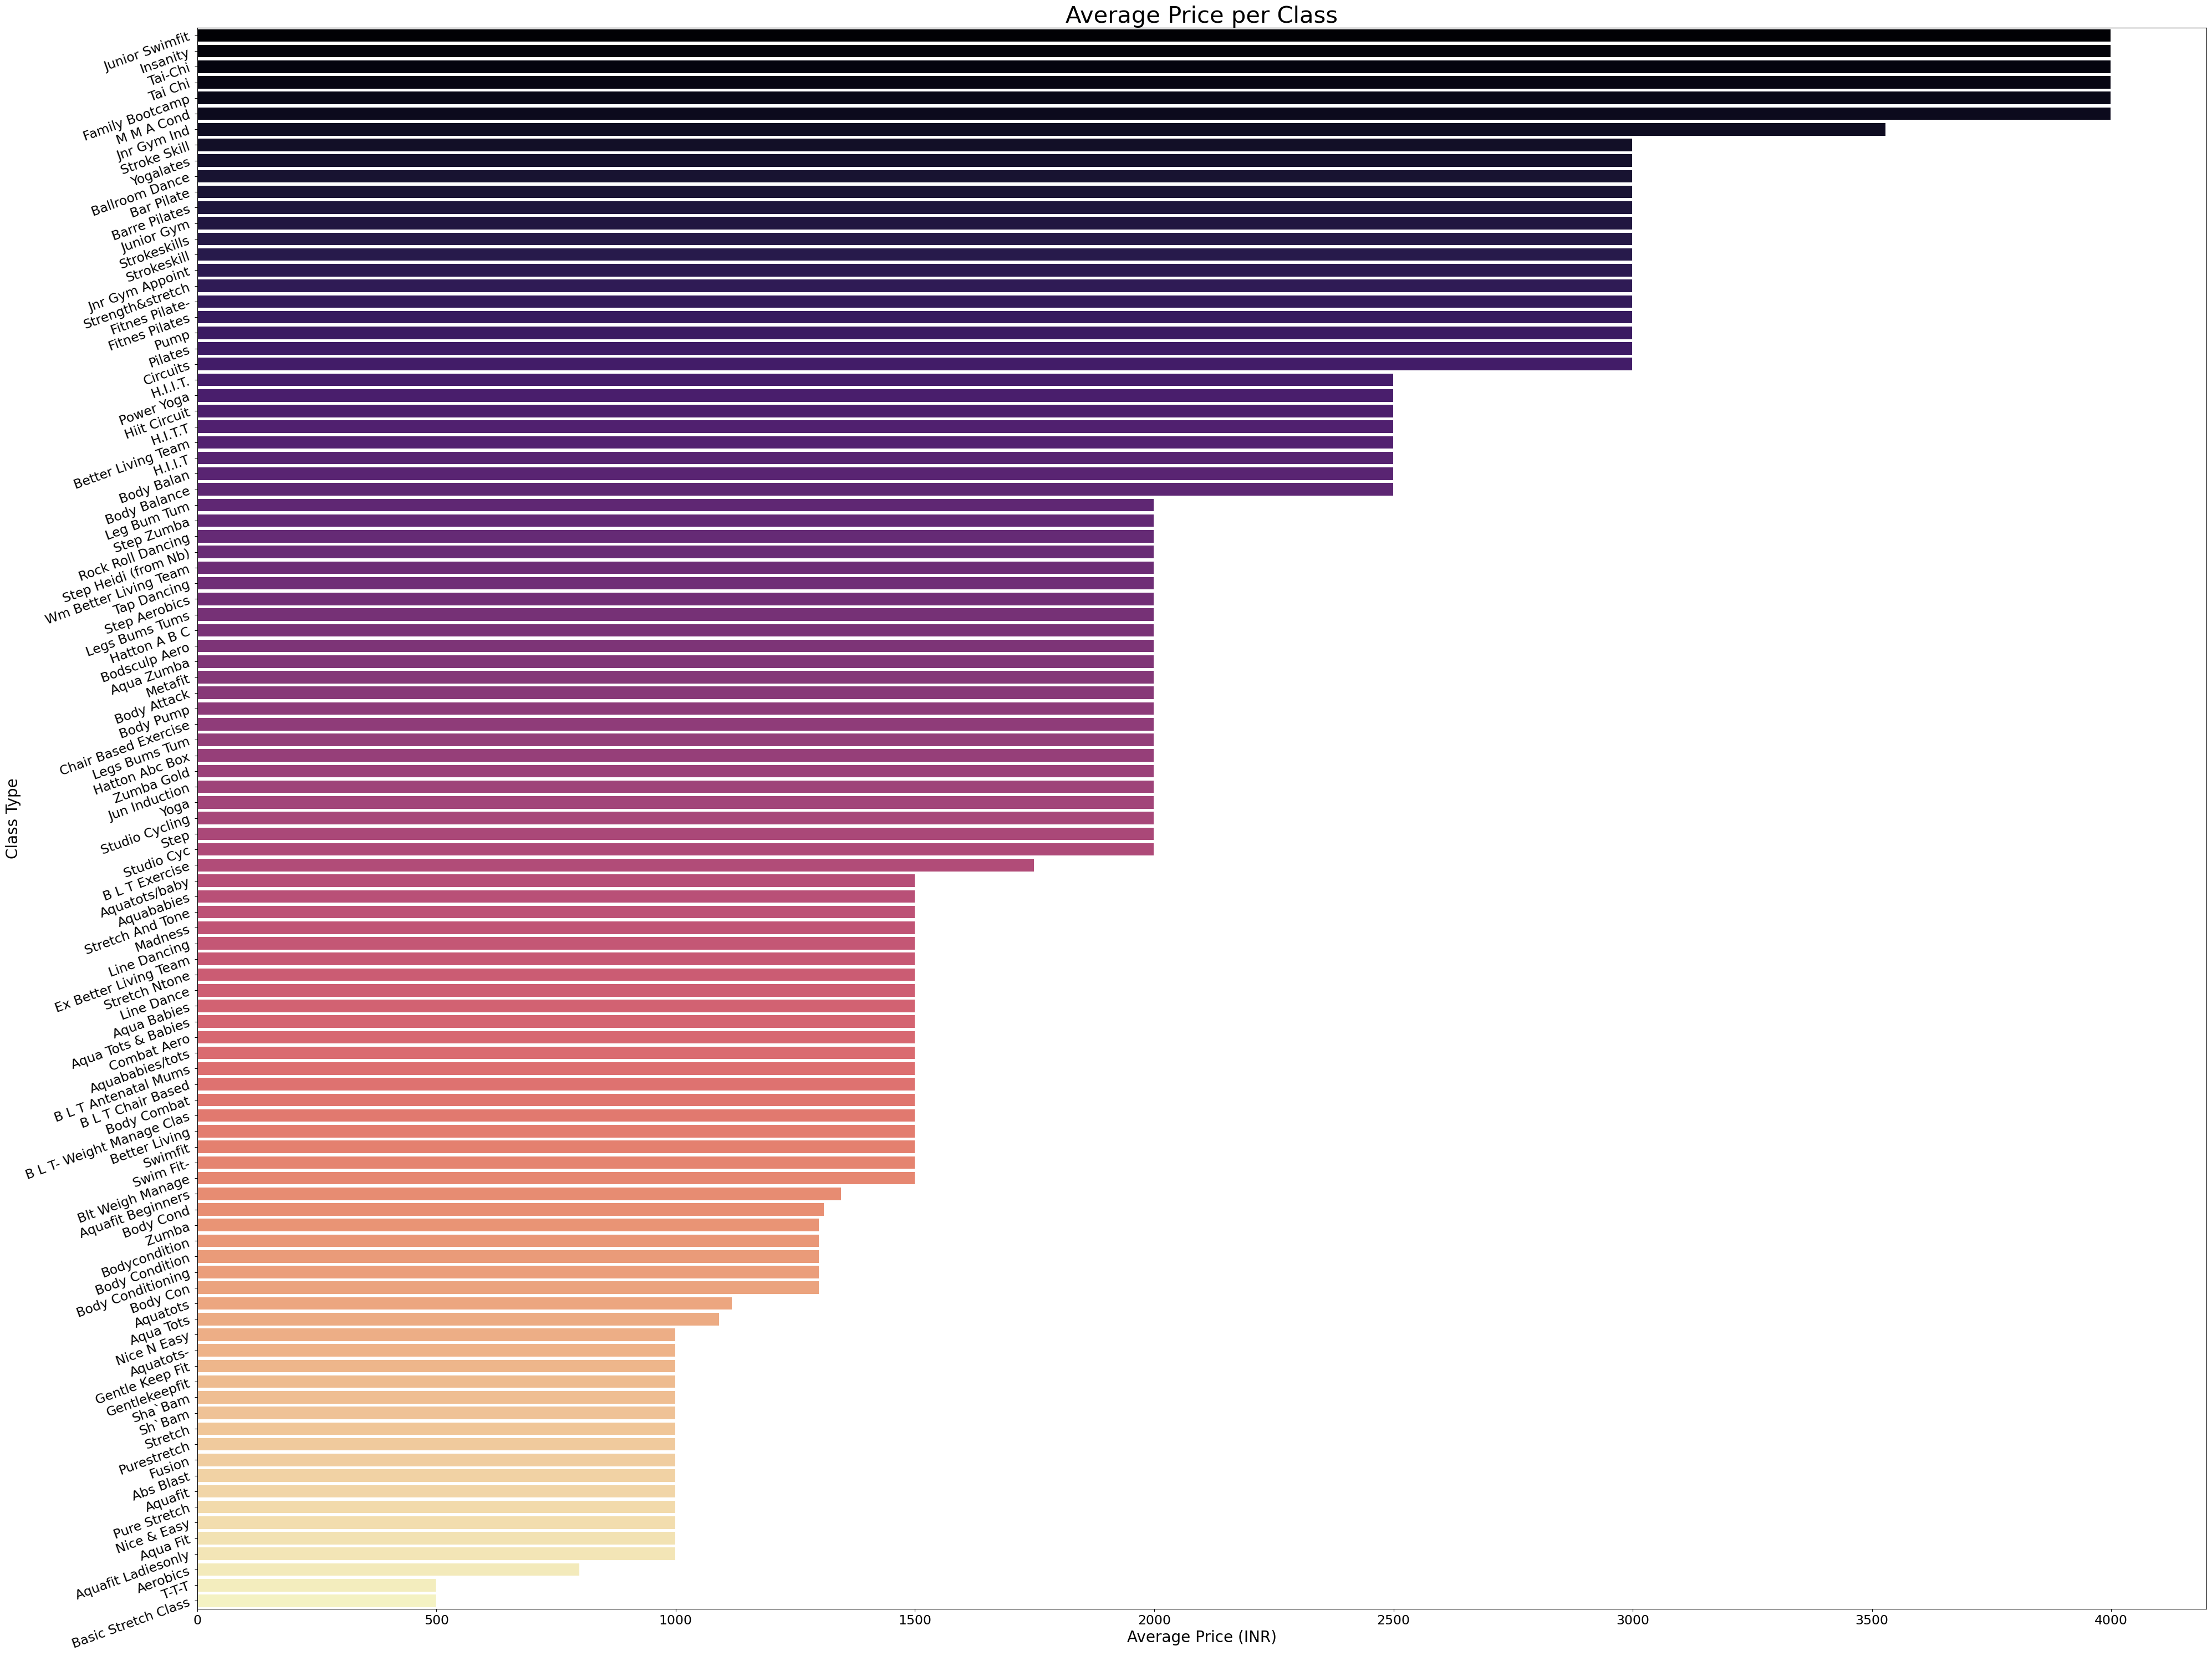

In [23]:
plt.figure(figsize=(40,30))
sns.barplot(x=average_price_per_class.values, y=average_price_per_class.index, palette='magma', order=average_price_per_class.sort_values(ascending=False).index)
plt.title('Average Price per Class',fontsize=30)
plt.xlabel('Average Price (INR)',fontsize=20)
plt.ylabel('Class Type',fontsize=20)
plt.xticks( fontsize=17)
plt.yticks(rotation=20 , fontsize=17)
plt.tight_layout()
plt.show()


##### From above graph , we can see junior swimfit, insanity, Tai-Chi , family bootcamp these all have higher price  

## Outliers Identification

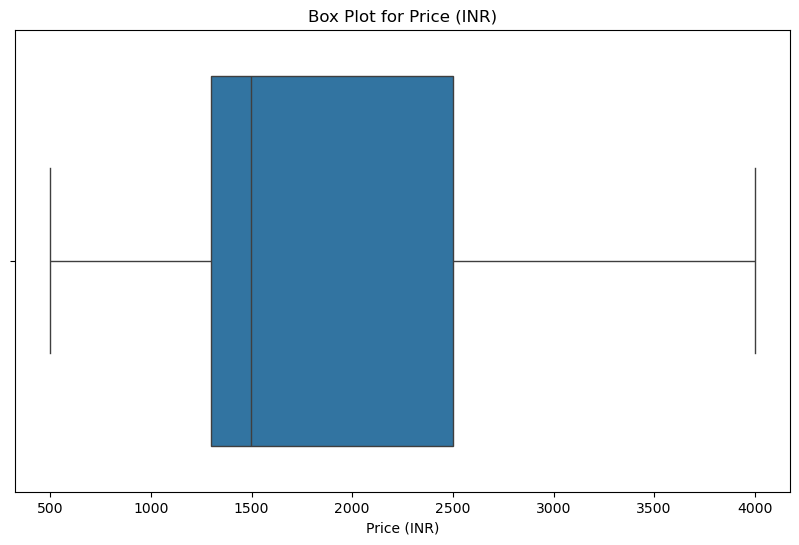

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price (INR)', data=data)
plt.title('Box Plot for Price (INR)')
plt.xlabel('Price (INR)')
plt.show()

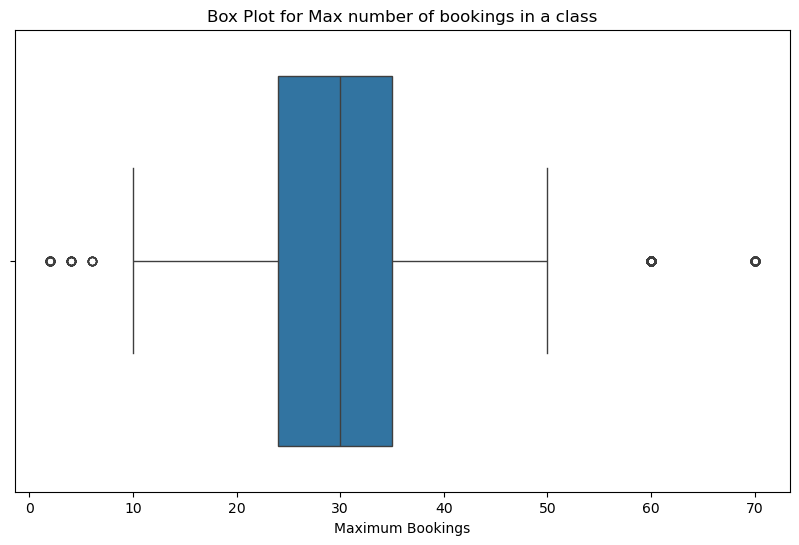

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MaxBookees', data=data)
plt.title('Box Plot for Max number of bookings in a class')
plt.xlabel('Maximum Bookings')
plt.show()

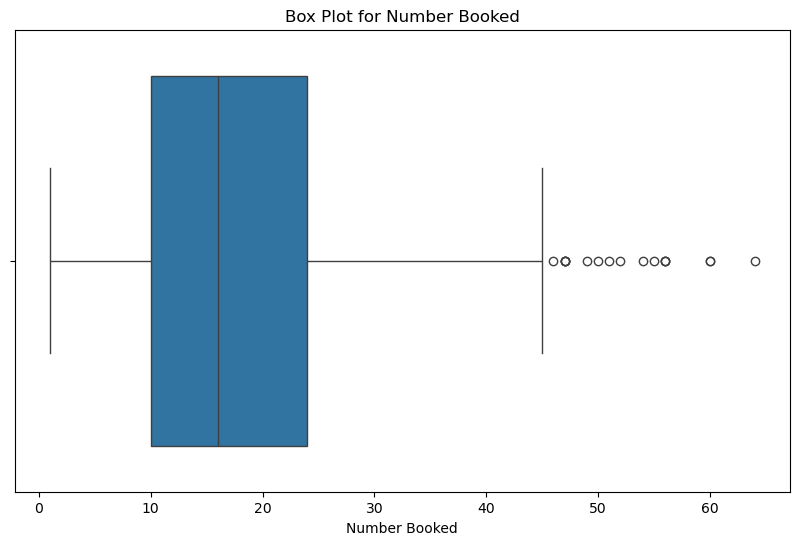

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number Booked', data=data)
plt.title('Box Plot for Number Booked')
plt.xlabel('Number Booked')
plt.show()

In [29]:
def identify_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers[column].count()

# Identify outliers in 'Price (INR)' and 'Number Booked'
price_outliers = identify_outliers(data, 'Price (INR)')
booked_outliers = identify_outliers(data, 'Number Booked')
MaxBookees_outlier =identify_outliers(data, 'MaxBookees')

In [30]:
price_outliers

0

In [31]:
booked_outliers , MaxBookees_outlier

(17, 550)

In [32]:
data.shape

(3289, 12)

In [33]:
#Clipping -Replace outliers with a specific value (e.g., the nearest percentile or a threshold).
lower_limit = data['MaxBookees'].quantile(0.05)
upper_limit = data['MaxBookees'].quantile(0.95)

data['MaxBookees'] = data['MaxBookees'].clip(lower=lower_limit, upper=upper_limit)

In [34]:
MaxBookees_outlier

550

In [35]:

#Extracting relevant features 
features  = ["Price (INR)","Number Booked","MaxBookees"]
model_df = data[features].copy()
print(model_df.head())

   Price (INR)  Number Booked  MaxBookees
0          499             12          25
1          499             15          25
2          499             14          25
3          499              9          25
4          499              7          25
